# generation of a document of plots
Tim Tyree<br>
9.4.2021

In [1]:
from lib.my_initialization import *
from lib import *
%load_ext autoreload
%autoreload 2

import random,scipy
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
import matplotlib as mpl #for colorbar
from scipy import stats
#DONE: hook this routine up to dask
#DONT: hook this routine up to dask_cuda

In [2]:
# # For darkmode plots
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

#TODO(first, find/ask wj for an uncertainty estimate for his data... Tell wj that my uncertainty esimate is about 1% for a 95% confidence that my values are accurate to 1% of their groundtruth value): make error bars also include the variance from the full model 

In [3]:
# from lib.my_initialization import *
# from lib import *
# # import random,scipy

# if __name__=="__main__":
#the full bluf routine start to finish
# input_fn=search_for_file()
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_16_all/job.out.14688026.0"
bluf_dir=gener_bluf_q_vs_w_for_csv_folder(input_fn)
# gener_bluf(task_lst, bluf_dir, bbox_inches='tight', save_tight=True)
beep(3)

#open the outputed .pdf automatically
import webbrowser
webbrowser.open_new(r'file://' + bluf_dir);

saving .pdf to
/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_16_all_plotted.pdf...


<Figure size 432x288 with 0 Axes>

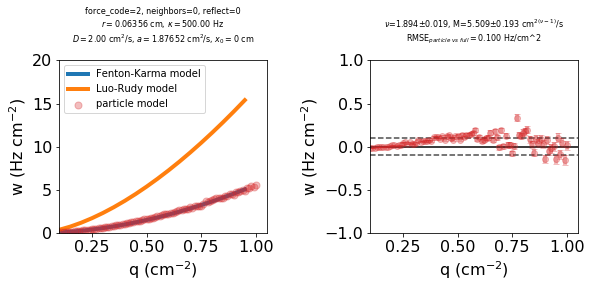

In [4]:
#test the plotters
# input_fn=search_for_file()
input_fn="/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_16_all/job.out.14688026.0"
#plot figure-ready plots for one trial
fig,axs=plt.subplots(ncols=2,figsize=(12,6))
retval=q_vs_w_plotter_function(axs[0],data=input_fn)
assert(retval)
retval=q_vs_Delta_w_plotter_function(axs[1],data=input_fn)
# assert(retval)
axs[0].margins(x=0.95,y=0.95)
axs[1].margins(x=0.95,y=0.95)

left_margin=0.2
right_margin=0.2
top_margin=0.4
bottom_margin=0.2
wspace=0.5
hspace=0.2


plt.subplots_adjust(left=left_margin, bottom=bottom_margin, right=1-right_margin, top=1-top_margin, wspace=wspace, hspace=hspace)
# plt.tight_layout()
plt.show()

__Introductary Notes__
- here, the powerlaw fit is w=M*q**m, and Delta_X is the maximum disagreement one could expect to observe with 95% confidence.
- here, we observe Delta_X concerns disagreements between statistically independent measurements of X.
- ...

__Notes on nonsense local data__
- I still cannot explain/reproduce the anomalous drop in reaction rates
- This doesn't seem to be a problem with the remote data generation pipeline
- Quickest fix is to dev run 16 to run the ~55 jobs I have right now in run_15_all_ar_star.csv

__Notes on remote data__
- appears monotonic from a first glance at the raw numbers...

__A note on this data from the local pipeline__<br>
this data from the local pipeline is not making sense... there's a million moving parts, and i have recently used the remote pipeline... Maybe they cross talked because they print helper files to the same directories... Yep... I'd bet that's causing the wonky reads.  I have verified the problem does not exist in the funcitonal string formatting...  Therefore, we have the courage to say...

 __DONE:__ dev quick ar_star remote data run with 55 jobs gener_run_16.py and run it on the cloud!
 
 Now... Let's analyze ^these nifty repeatable results
 
 
- TODO(if results are spectacular): automate repeatable results to machine precision by making a copy of the main .submit file in c/attractive/ with every randomization seed set to 1234...

In [5]:
# printing=False
# #we are not in the rounding phase...
# #recall the results from the full models
# wjr=recall_powerlaw_fits_to_full_models()
# if printing:
#     print_the_dict(wjr)
# #TODO(later): plot the trials that were closest to ytrgt=m_FK
# m_FK=wjr['fk_pbc']['m']

In [6]:
# def PlotTextBox(ax,text,text_width=150.,xcenter=0.5,ycenter=0.5,fontsize=20, family='serif', style='italic',horizontalalignment='center',
#      verticalalignment='center', color='black',use_turnoff_axis=True,**kwargs):
#     txt=ax.text(xcenter,ycenter,text,horizontalalignment=horizontalalignment,
#          verticalalignment=verticalalignment, transform = ax.transAxes, fontsize=fontsize, color='black', wrap=True,**kwargs)
#     txt._get_wrap_line_width = lambda : text_width
#     if use_turnoff_axis:
#         ax.axis('off')

# def text_plotter_function(ax,data):
#     text=data
# #     ax.text(0.5, 0.5, text, family='serif', style='italic', ha='right', wrap=True)
#     PlotTextBox(ax,text,fontsize=10)
#     return True

In [7]:
# fig = plt.figure(1, clear=True)
# ax = fig.add_subplot(111)

# text = ('Lorem ipsum dolor sit amet, consectetur adipiscing elit, '
#         'sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. ')

# # METHOD 1: OVERRIDE METHOD
# # Create a text box using fancy boxes.
# txt = ax.text(.5, .5, text, ha='center', va='center', wrap=True,fontsize=18)#,
# #               bbox=dict(boxstyle='square', fc='w', ec='w'))
# #override the object's method for getting available width. width is in pixels.
# txt._get_wrap_line_width = lambda : 200.


# ax.axis('off')

In [8]:
# def gener_bluf_q_vs_w_for_csv_folder(input_fn):
#     text_left =("(left column) the mean annihilation rate, $w$, versus the particle number density, $q$, for (blue) the Fenton-Karma model, (orange) the Luo-Rudy model, and (red) the particle model.  The parameters of the particle models were selected as the critical points found in the $(r,a)$ plane with $D$ and $\kappa$ fixed.")
#     text_right=("(right column) the disagreement of the mean annihilation rate of the particle model with that of the full model.  Error bars represent the 95% confidence intervals for the particle model, supposing there is zero uncertainty from the full model.")
#     wjr=recall_powerlaw_fits_to_full_models()
#     #copy/paste of Example Usage in bluf.py
#     modname=os.path.basename(os.path.dirname(input_fn))
#     save_folder=os.path.dirname(os.path.dirname(input_fn))
#     # save_folder=f"{nb_dir}/../fig"
#     bluf_dir = save_folder+f"/{modname}_plotted.pdf"
#     # bluf_dir = f"{nb_dir}/Figures/{modname}_plotted.pdf"

#     # settings from lib
#     # nb_dir=os.path.dirname(os.path.dirname(os.getcwd()))
#     #find all files matching pattern
#     # input_fn_lst=get_all_files_matching_pattern(file=input_fn,trgt='')
#     input_fn_lst=os.listdir(os.path.dirname(input_fn))
#     # input_fn_lst=os.listdir(os.path.dirname(input_fn))
#     os.chdir(os.path.dirname(input_fn))
#     #define the lists of plotter tasks
#     task_lst = [
#         (text_plotter_function,text_left),
#         (text_plotter_function,text_right)
#     ]
#     for fn in input_fn_lst:
#         task_lst.append((q_vs_w_plotter_function, os.path.abspath(fn)))
#         task_lst.append((q_vs_Delta_w_plotter_function, os.path.abspath(fn)))

#     print(f'saving .pdf to\n{bluf_dir}...')
#     gener_bluf(task_lst, bluf_dir, save_tight=True)
